In [1]:
from jaxnn import dataset
from jaxnn.model import Model
from jaxnn import nn
from jaxnn import optimizers
from jaxnn import loss
import jax
from jax import numpy as jnp
from matplotlib import pyplot as plt

2022-06-23 08:42:12.468069: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-23 08:42:12.490029: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-23 08:42:12.491589: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-23 08:42:12.635115: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or dire

In [2]:
dataloader = dataset.mnist_dataloader(map_fn=lambda x: x / 255., batch_size=256)

In [3]:
model = Model([
    nn.flatten(),
    # nn.dense(256),
    # nn.relu(),
    # nn.dense(64),
    # nn.relu(),
    nn.dense(10),
    nn.softmax()
])
model.fit(data_loader=dataloader,
          optimizer=optimizers.sgd(lr=1e-1),
          loss_fn=loss.categorical_cross_entropy(from_logits=False),
          epochs=50,
          metrics=['accuracy'])


ValueError: Incompatible shapes for broadcasting: ((256, 10), (1, 784))

In [ ]:
x, y = dataset.mnist_testdata()
x = x / 255.

In [ ]:
y_hat = model.predict(x)
model.accuracy(y_hat, y)

DeviceArray(0.8941, dtype=float32)

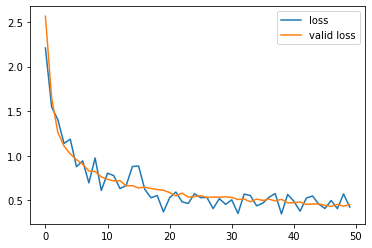

In [ ]:
l1, = plt.plot(model.losses)
l2, = plt.plot(model.valid_losses)
plt.legend([l1, l2], ['loss', 'valid loss'])
plt.show()

In [ ]:
y_hat = model.predict(x[:10])

In [ ]:
jnp.argmax(y_hat, axis=1), y[:10]

(DeviceArray([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int32),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))